In [1]:
import pandas as pd
df = pd.read_csv(r'/Users/adhamahmed/Desktop/Thesis/e-shop clothing 2008 2.csv')
df.head()


,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page (1 to 5)
0,2008,4,1,1,29,1,trousers,A13,beige,bottom middle,en face,$28.00,no,1
1,2008,4,1,2,29,1,trousers,A16,beige,bottom right,en face,$33.00,no,1
2,2008,4,1,3,29,1,skirts,B4,olive,top middle,en face,$52.00,yes,1
3,2008,4,1,4,29,1,skirts,B17,gray,bottom right,profile,$38.00,no,1
4,2008,4,1,5,29,1,skirts,B8,brown,top right,profile,$52.00,yes,1


In [2]:
sessionID = df["session ID"]
category = df["page 1 (main category)"]
sessionID.head()
category.head()


0    trousers
1    trousers
2      skirts
3      skirts
4      skirts
Name: page 1 (main category), dtype: object

In [3]:
ID_category = df[["session ID", "page 1 (main category)"]]
ID_category.head()

,session ID,page 1 (main category)
0,1,trousers
1,1,trousers
2,1,skirts
3,1,skirts
4,1,skirts


In [4]:
ID_category = df[["session ID", "page 1 (main category)"]]
print(ID_category)

        session ID page 1 (main category)
0                1               trousers
1                1               trousers
2                1                 skirts
3                1                 skirts
4                1                 skirts
...            ...                    ...
165469       24024                 skirts
165470       24025               trousers
165471       24026               trousers
165472       24026                blouses
165473       24026                 skirts

[165474 rows x 2 columns]


In [5]:
x = df.groupby(['session ID'])['page 1 (main category)'].agg(
                                              lambda f: ','.join(f)).to_frame().reset_index()
# x.columns = ['session_id', 'products']
x.head()

,session ID,page 1 (main category)
0,1,"trousers,trousers,skirts,skirts,skirts,blouses..."
1,2,"skirts,skirts,skirts,skirts,trousers,trousers,..."
2,3,"skirts,blouses,blouses,blouses,blouses,sale"
3,4,"trousers,trousers,blouses,blouses"
4,5,blouses


In [6]:
data = list(x["page 1 (main category)"].apply(lambda x:x.split(",") ))
data


[['trousers',
  'trousers',
  'skirts',
  'skirts',
  'skirts',
  'blouses',
  'blouses',
  'sale',
  'sale'],
 ['skirts',
  'skirts',
  'skirts',
  'skirts',
  'trousers',
  'trousers',
  'skirts',
  'sale',
  'sale',
  'sale'],
 ['skirts', 'blouses', 'blouses', 'blouses', 'blouses', 'sale'],
 ['trousers', 'trousers', 'blouses', 'blouses'],
 ['blouses'],
 ['blouses', 'blouses', 'blouses', 'skirts', 'skirts'],
 ['trousers',
  'blouses',
  'sale',
  'sale',
  'sale',
  'sale',
  'sale',
  'sale',
  'sale',
  'sale',
  'skirts'],
 ['blouses',
  'skirts',
  'blouses',
  'blouses',
  'blouses',
  'blouses',
  'blouses',
  'blouses',
  'skirts'],
 ['trousers', 'trousers', 'skirts'],
 ['trousers', 'skirts', 'skirts', 'skirts', 'skirts'],
 ['trousers'],
 ['skirts', 'skirts', 'skirts', 'skirts', 'skirts', 'blouses', 'sale'],
 ['trousers', 'trousers', 'trousers'],
 ['trousers'],
 ['trousers',
  'trousers',
  'trousers',
  'skirts',
  'skirts',
  'skirts',
  'skirts',
  'skirts',
  'skirts',
  '

In [7]:
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df

,blouses,sale,skirts,trousers
0,True,True,True,True
1,0,True,True,True
2,True,True,True,0
3,True,0,0,True
4,True,0,0,0
...,...,...,...,...
24021,0,0,0,True
24022,0,True,0,True
24023,0,0,True,0
24024,0,0,0,True


In [8]:
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df

,blouses,sale,skirts,trousers
0,True,True,True,True
1,False,True,True,True
2,True,True,True,False
3,True,False,False,True
4,True,False,False,False
...,...,...,...,...
24021,False,False,False,True
24022,False,True,False,True
24023,False,False,True,False
24024,False,False,False,True


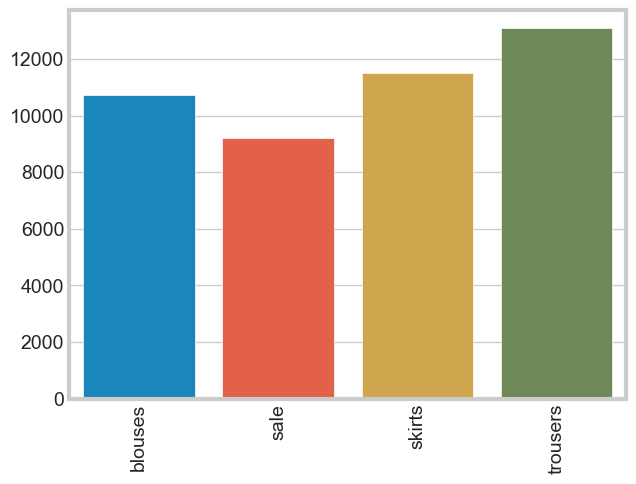

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
count = df.sum()
bar = sns.barplot(x=count.index, y=count.values)
bar.set_xticklabels(bar.get_xticklabels(), rotation='vertical');

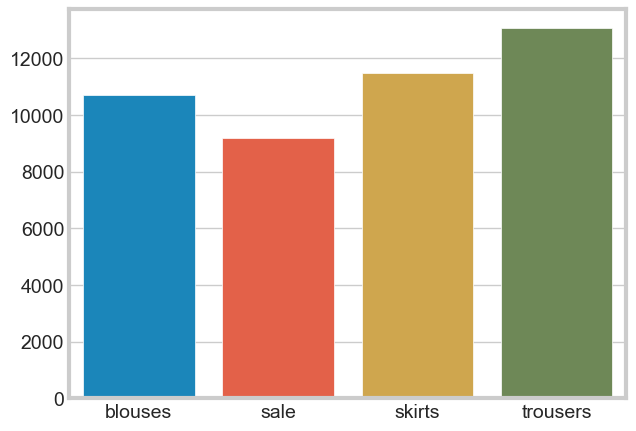

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
count = df.sum()
bar = sns.barplot(x=count.index, y=count.values)
bar.set_xticklabels(bar.get_xticklabels(), rotation='horizontal');

In [34]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(df, min_support=0.05, use_colnames=True)
freq_items.sort_values('support', ascending=False)

,support,itemsets
3,0.544493,(trousers)
2,0.478232,(skirts)
0,0.446350,(blouses)
1,0.382586,(sale)
6,0.247232,"(blouses, trousers)"
9,0.224840,"(skirts, trousers)"
5,0.208316,"(blouses, skirts)"
8,0.202655,"(sale, trousers)"
4,0.188754,"(blouses, sale)"
7,0.174103,"(sale, skirts)"


In [35]:
association_rules(freq_items, metric='confidence', min_threshold=0.50).sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(blouses),(trousers),0.446350,0.544493,0.247232,0.553898,1.017272,0.004198,1.021081,0.030666
1,(sale),(trousers),0.382586,0.544493,0.202655,0.529700,0.972830,-0.005660,0.968544,-0.043277
6,"(blouses, skirts)",(trousers),0.208316,0.544493,0.138808,0.666334,1.223768,0.025381,1.365156,0.230965
7,"(blouses, trousers)",(skirts),0.247232,0.478232,0.138808,0.561448,1.174007,0.020574,1.189751,0.196896
8,"(skirts, trousers)",(blouses),0.224840,0.446350,0.138808,0.617364,1.383139,0.038451,1.446937,0.357355
4,"(blouses, sale)",(trousers),0.188754,0.544493,0.117040,0.620066,1.138794,0.014265,1.198910,0.150236
5,"(sale, trousers)",(blouses),0.202655,0.446350,0.117040,0.577531,1.293898,0.026585,1.310512,0.284873
9,"(sale, skirts)",(trousers),0.174103,0.544493,0.106302,0.610567,1.121348,0.011504,1.169665,0.131029
10,"(sale, trousers)",(skirts),0.202655,0.478232,0.106302,0.524543,1.096838,0.009385,1.097403,0.110728
2,"(blouses, sale)",(skirts),0.188754,0.478232,0.104096,0.551488,1.153182,0.013827,1.163332,0.163741


In [36]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(df, min_support=0.20, use_colnames=True)
freq_items.sort_values('support', ascending=False)

,support,itemsets
3,0.544493,(trousers)
2,0.478232,(skirts)
0,0.446350,(blouses)
1,0.382586,(sale)
5,0.247232,"(blouses, trousers)"
7,0.224840,"(skirts, trousers)"
4,0.208316,"(blouses, skirts)"
6,0.202655,"(sale, trousers)"


In [39]:
from mlxtend.frequent_patterns import fpgrowth
freq_items = fpgrowth(df, min_support=0.20, use_colnames=True)
freq_items.sort_values('support', ascending=False)

,support,itemsets
0,0.544493,(trousers)
1,0.478232,(skirts)
2,0.446350,(blouses)
3,0.382586,(sale)
5,0.247232,"(blouses, trousers)"
4,0.224840,"(skirts, trousers)"
6,0.208316,"(blouses, skirts)"
7,0.202655,"(sale, trousers)"


In [40]:
association_rules(freq_items, metric='confidence', min_threshold=0.50).sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(blouses),(trousers),0.446350,0.544493,0.247232,0.553898,1.017272,0.004198,1.021081,0.030666
1,(sale),(trousers),0.382586,0.544493,0.202655,0.529700,0.972830,-0.005660,0.968544,-0.043277


In [41]:
from mlxtend.frequent_patterns import fpgrowth

min_support = 0.2


frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)


print(frequent_itemsets)

    support             itemsets
0  0.544493           (trousers)
1  0.478232             (skirts)
2  0.446350            (blouses)
3  0.382586               (sale)
4  0.224840   (skirts, trousers)
5  0.247232  (blouses, trousers)
6  0.208316    (blouses, skirts)
7  0.202655     (sale, trousers)


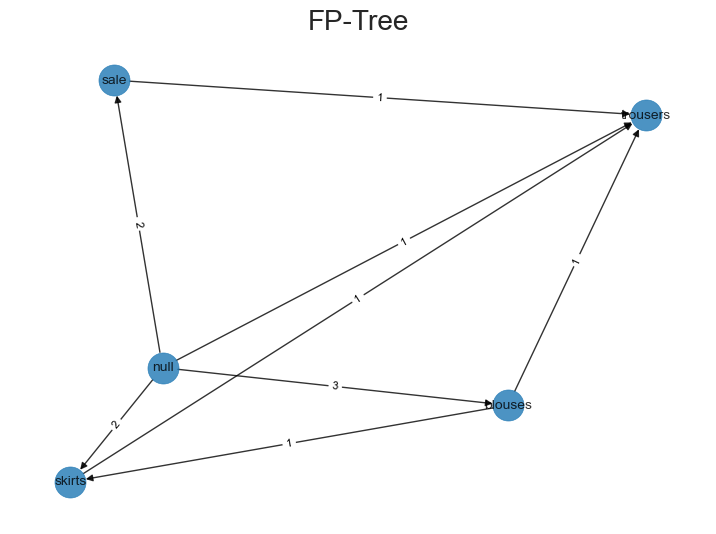

In [42]:
import matplotlib.pyplot as plt
import networkx as nx

fp_tree = nx.DiGraph()

fp_tree.add_node('null')

for _, itemset in frequent_itemsets.iterrows():
    items = itemset.itemsets
    
    if len(items) == 0:
        continue
    
    curr_node = 'null'  
    for i, item in enumerate(items):
        
        if fp_tree.has_edge(curr_node, item):
            
            fp_tree[curr_node][item]['weight'] += 1
        else:
            
            fp_tree.add_edge(curr_node, item, weight=1)
        
        curr_node = item


pos = nx.spring_layout(fp_tree)


fig, ax = plt.subplots(figsize=(8, 6))
nx.draw(fp_tree, pos, with_labels=True, node_size=500, font_size=10, alpha=0.8, arrows=True, ax=ax)
edge_labels = nx.get_edge_attributes(fp_tree, 'weight')
nx.draw_networkx_edge_labels(fp_tree, pos, edge_labels=edge_labels, font_size=8)
ax.set_title("FP-Tree")
plt.show()



In [43]:
import pandas as pd
fa = pd.read_csv(r'/Users/adhamahmed/Desktop/Thesis/e-shop clothing 2008 2.csv')
fa.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page (1 to 5)
0,2008,4,1,1,29,1,trousers,A13,beige,bottom middle,en face,$28.00,no,1
1,2008,4,1,2,29,1,trousers,A16,beige,bottom right,en face,$33.00,no,1
2,2008,4,1,3,29,1,skirts,B4,olive,top middle,en face,$52.00,yes,1
3,2008,4,1,4,29,1,skirts,B17,gray,bottom right,profile,$38.00,no,1
4,2008,4,1,5,29,1,skirts,B8,brown,top right,profile,$52.00,yes,1


In [44]:
ID_colour = fa[["session ID", "colour"]]
ID_colour.head()

,session ID,colour
0,1,beige
1,1,beige
2,1,olive
3,1,gray
4,1,brown


In [45]:
t = fa.groupby(['session ID'])['colour'].agg(
                                              lambda f: ','.join(f)).to_frame().reset_index()

t.head()


,session ID,colour
0,1,"beige,beige,olive,gray,brown,gray,burgundy,of ..."
1,2,"of many colors,red,pink,black,blue,blue,black,..."
2,3,"gray,brown,violet,of many colors,white,green"
3,4,"black,black,brown,black"
4,5,white


In [46]:
data1 = list(t["colour"].apply(lambda x:x.split(",") ))
data1


[['beige',
  'beige',
  'olive',
  'gray',
  'brown',
  'gray',
  'burgundy',
  'of many colors',
  'gray'],
 ['of many colors',
  'red',
  'pink',
  'black',
  'blue',
  'blue',
  'black',
  'blue',
  'of many colors',
  'of many colors'],
 ['gray', 'brown', 'violet', 'of many colors', 'white', 'green'],
 ['black', 'black', 'brown', 'black'],
 ['white'],
 ['violet', 'gray', 'white', 'gray', 'violet'],
 ['blue',
  'pink',
  'white',
  'black',
  'white',
  'of many colors',
  'gray',
  'gray',
  'gray',
  'blue',
  'olive'],
 ['brown',
  'green',
  'pink',
  'red',
  'green',
  'white',
  'of many colors',
  'green',
  'pink'],
 ['brown', 'navy blue', 'violet'],
 ['navy blue', 'brown', 'olive', 'red', 'gray'],
 ['blue'],
 ['olive', 'red', 'red', 'of many colors', 'black', 'white', 'green'],
 ['navy blue', 'blue', 'blue'],
 ['brown'],
 ['navy blue',
  'blue',
  'blue',
  'brown',
  'blue',
  'red',
  'red',
  'of many colors',
  'red',
  'gray',
  'beige',
  'navy blue',
  'red',
  'gre

In [47]:
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data = a.fit(data1).transform(data1)
fa = pd.DataFrame(a_data,columns=a.columns_)
fa = fa.replace(False,0)
fa

,beige,black,blue,brown,burgundy,gray,green,navy blue,of many colors,olive,pink,red,violet,white
0,True,0,0,True,True,True,0,0,True,True,0,0,0,0
1,0,True,True,0,0,0,0,0,True,0,True,True,0,0
2,0,0,0,True,0,True,True,0,True,0,0,0,True,True
3,0,True,0,True,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24021,True,0,0,0,0,0,0,True,0,0,0,0,0,True
24022,True,True,True,True,0,0,0,0,0,0,0,0,0,True
24023,0,True,0,0,0,0,0,0,0,0,0,0,0,0
24024,0,0,True,0,0,0,0,0,0,0,0,0,0,0


In [48]:
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
a = TransactionEncoder()
a_data1 = a.fit(data1).transform(data1)
fa = pd.DataFrame(a_data1,columns=a.columns_)
fa

,beige,black,blue,brown,burgundy,gray,green,navy blue,of many colors,olive,pink,red,violet,white
0,True,False,False,True,True,True,False,False,True,True,False,False,False,False
1,False,True,True,False,False,False,False,False,True,False,True,True,False,False
2,False,False,False,True,False,True,True,False,True,False,False,False,True,True
3,False,True,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24021,True,False,False,False,False,False,False,True,False,False,False,False,False,True
24022,True,True,True,True,False,False,False,False,False,False,False,False,False,True
24023,False,True,False,False,False,False,False,False,False,False,False,False,False,False
24024,False,False,True,False,False,False,False,False,False,False,False,False,False,False


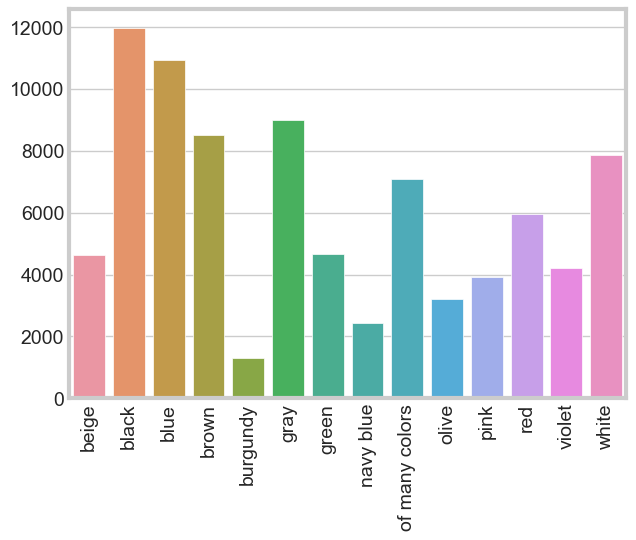

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
count = fa.sum()
bar = sns.barplot(x=count.index, y=count.values)
bar.set_xticklabels(bar.get_xticklabels(), rotation='vertical');

In [50]:
from mlxtend.frequent_patterns import apriori, association_rules

f_patterns = fpgrowth(fa, min_support=0.20, use_colnames=True)
f_patterns.sort_values('support', ascending=False)
f_patterns

,support,itemsets
0,0.374011,(gray)
1,0.354283,(brown)
2,0.295347,(of many colors)
3,0.498127,(black)
4,0.455548,(blue)
5,0.248231,(red)
6,0.327895,(white)
7,0.236702,"(black, gray)"
8,0.228752,"(black, brown)"
9,0.247315,"(black, blue)"


In [51]:
association_rules(f_patterns, metric='confidence', min_threshold=0.50).sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(brown),(black),0.354283,0.498127,0.228752,0.645677,1.296209,0.052274,1.416427,0.353900
0,(gray),(black),0.374011,0.498127,0.236702,0.632873,1.270506,0.050397,1.367030,0.340121
3,(white),(black),0.327895,0.498127,0.201906,0.615765,1.236161,0.038573,1.306163,0.284247
2,(blue),(black),0.455548,0.498127,0.247315,0.542896,1.089875,0.020395,1.097941,0.151462


In [52]:
from mlxtend.frequent_patterns import fpgrowth

f_patterns = fpgrowth(fa, min_support=0.20, use_colnames=True)
f_patterns.sort_values('support', ascending=False)
f_patterns

,support,itemsets
0,0.374011,(gray)
1,0.354283,(brown)
2,0.295347,(of many colors)
3,0.498127,(black)
4,0.455548,(blue)
5,0.248231,(red)
6,0.327895,(white)
7,0.236702,"(black, gray)"
8,0.228752,"(black, brown)"
9,0.247315,"(black, blue)"


In [53]:
association_rules(f_patterns, metric='confidence', min_threshold=0.50).sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(brown),(black),0.354283,0.498127,0.228752,0.645677,1.296209,0.052274,1.416427,0.353900
0,(gray),(black),0.374011,0.498127,0.236702,0.632873,1.270506,0.050397,1.367030,0.340121
3,(white),(black),0.327895,0.498127,0.201906,0.615765,1.236161,0.038573,1.306163,0.284247
2,(blue),(black),0.455548,0.498127,0.247315,0.542896,1.089875,0.020395,1.097941,0.151462


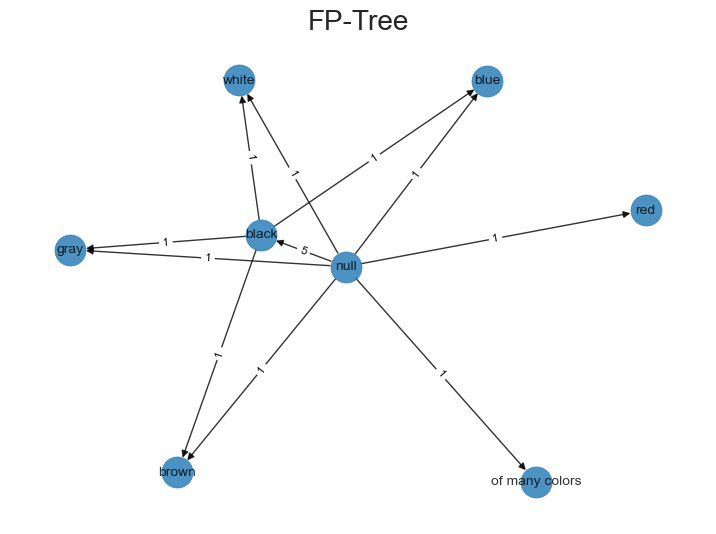

In [58]:
import matplotlib.pyplot as plt
import networkx as nx


fp_tree = nx.DiGraph()

fp_tree.add_node('null')

for _, itemset in f_patterns.iterrows():
    items = itemset.itemsets
    
    if len(items) == 0:
        continue
    
    curr_node = 'null'  
    for i, item in enumerate(items):
        
        if fp_tree.has_edge(curr_node, item):
            
            fp_tree[curr_node][item]['weight'] += 1
        else:
           
            fp_tree.add_edge(curr_node, item, weight=1)
        
        curr_node = item

pos = nx.spring_layout(fp_tree)


fig, ax = plt.subplots(figsize=(8, 6))
nx.draw(fp_tree, pos, with_labels=True, node_size=500, font_size=10, alpha=0.8, arrows=True, ax=ax)
edge_labels = nx.get_edge_attributes(fp_tree, 'weight')
nx.draw_networkx_edge_labels(fp_tree, pos, edge_labels=edge_labels, font_size=8)
ax.set_title("FP-Tree")
plt.show()